In [ ]:
# Copyright 2023, Acadential, All rights reserved.

# 9-3. Training Loop

이번 시간에는 Training Loop을 구현해보겠습니다. \
Training Loop이란 모델의 학습을 위한 반복문을 의미합니다.

In [15]:
# 필요한 Library들을 import
import torch 
from tqdm import tqdm 
from torch import nn 
# matplotlib for plotting
import matplotlib.pyplot as plt

# Importing the model 
# 저희가 앞선 실습에서 만들었던 모델을 가져옵니다.
from src.model import NeuralNetwork

# Importing the dataloaders
from src.data import get_dataloaders



## Define and initialize the model

In [16]:
model = NeuralNetwork()

## Load dataset and create dataloader

In [17]:
train_dataloader, test_dataloader = get_dataloaders()

## Define loss function

Loss을 정의해주어야하는데, Classification 문제이기 때문에 CrossEntropyLoss를 사용하겠습니다. \
```reduction``` 옵션을 지정하지는 않았는데 (default값으로 ```reduction="mean"```), 이는 loss를 계산할 때, batch의 평균을 사용하겠다는 의미입니다.


In [18]:
loss_fn = nn.CrossEntropyLoss()

## Define optimizer
Section 8에서 살펴보았듯이 Optimizer은 모델의 파라미터를 업데이트하는 방법을 정의합니다. \
여기서는 SGD를 사용하겠습니다.

In [19]:
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001)

In [20]:
loss_history = []
epochs = 10

for epoch in range(epochs):
    tbar = tqdm(train_dataloader)
    for (batch, label) in tbar:
        pred = model(batch)  # forward pass
        loss = loss_fn(pred, label)  # loss 계산
        loss.backward()  # backward pass (Loss에 대한 gradient 계산)
        optimizer.step()  # parameter update (Gradient Descent 수행)
        optimizer.zero_grad()  # gradient 초기화
        tbar.set_description(f"Loss: {loss.item():.4f}")
        loss_history.append(loss.item())

Loss: 2.2743: 100%|██████████| 938/938 [00:02<00:00, 335.71it/s]


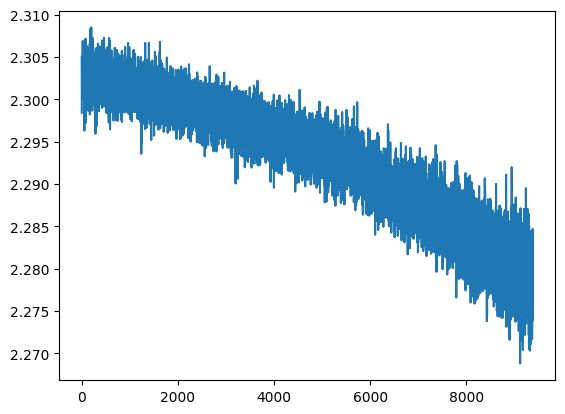

In [21]:
plt.figure()
plt.plot(loss_history)